In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
#importing textblob
import nltk
nltk.download()
from textblob import Textblob

#specify delimited of csv filed to be the tab character - '\t\'
#csv file contains no headers so set header = None
df = pd.read_csv('Movie_reviews.csv', delimiter = '\t', header = None)

#Creating the sentiment analysis function which returns a sentiment Classification label(1 = positive 0 = negative)
def sentimentAnalysis(text):
    #calling textblob for the current review
    #using exception handler to catch exceptions where the review is not in the proper format
    try:
        blob = TextBlob(text)
    except:
        None
        return
    
    sentenceCounter = 0
    totalSentiment = 0
    print('--New review--')
    print('--------------')
    #for each review, iterate through the sentences and get the sentiment score of each one
    for sentence in blob.sentences:
        #the sentenceCounter and totalSentiment will be used to average the sentiment score between 
        #all the sentences
        sentenceCounter = sentenceCounter + 1
        totalSentiment = totalSentiment + sentence.sentiment.polarity
        #printing each individual sentence and its score given by TextBlob
        print(sentence, ' ', sentence.sentiment.polarity)
    
    #Calculating the average score for the review by dividing the total sentiment
    #that was added from each sentence by the number of sentences
    averageScore = totalSentiment / sentenceCounter
    #printing the average score of the review
    print('Average score:', averageScore)
    


    #returns the average score rounded to 3 decimal places   
    return round(averageScore,3)


#assigning the actual reviews (third column) into a separate variable
movie_reviews = df[2]

#creating arrays to store the scores and labels for each review
sentimentScores =[]
sentimentLabels = []


#looping the reviews and for each one, execute the sentimentAnalysis function and create labels for each review
#finally store both scores and labels into the respective arrays, these will be appended to the dataframe
for index, review_text in enumerate(movie_reviews):
    score = sentimentAnalysis(review_text)
    try:
        if score > 0.1:
            sentimentLabels.append('Positive')
        else:
            sentimentLabels.append('Negative')
    except:
        sentimentLabels.append('None')
            
    sentimentScores.append(score)
    
#After all the reviews have been classified we can append the sentiment Labels and scores into the df
df['Sentiment_Scores'] = sentimentScores
df['Sentiment_Classification_Labels'] = sentimentLabels

#getting a count for both positive and negative reviews
positiveCount = len(df[df.Sentiment_Classification_Labels == 'Positive'])
negativeCount = len(df[df.Sentiment_Classification_Labels == 'Negative'])

#printing the total amount of positive and negative reviews
print('')
print('--Results--')
print('Number of Positive Reviews: ', positiveCount)
print('Number of Negative Reviews: ', negativeCount)

#display the dataframe which contains all the original columns plus the ones added for the scores and labels
#df




showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


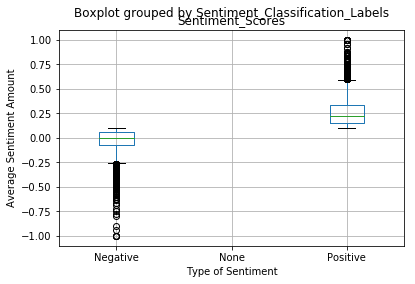

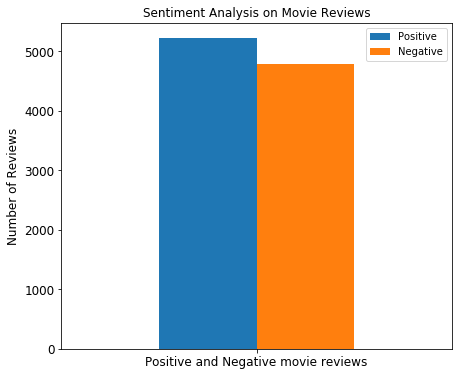

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
#importing textblob
from textblob import TextBlob

#specify delimited of csv filed to be the tab character - '\t\'
#csv file contains no headers so set header = None
df = pd.read_csv('Movie_reviews.csv', delimiter = '\t', header = None)

#Creating the sentiment analysis function which returns a sentiment Classification label(1 = positive 0 = negative)
def sentimentAnalysis(text):
    #calling textblob for the current review
    #using exception handler to catch exceptions where the review is not in the proper format
    try:
        blob = TextBlob(text)
    except:
        None
        return
    
    sentenceCounter = 0
    totalSentiment = 0

    #for each review, iterate through the sentences and get the sentiment score of each one
    for sentence in blob.sentences:
        #the sentenceCounter and totalSentiment will be used to average the sentiment score between 
        #all the sentences
        sentenceCounter = sentenceCounter + 1
        totalSentiment = totalSentiment + sentence.sentiment.polarity
        
    averageScore = totalSentiment / sentenceCounter
    #displaying results of the review 
    #print('Total Sentences:', sentenceCounter, 'Total Sentiment Score', totalSentiment,)
    #print('Average Score:', averageScore)


    #returns the average score rounded to 3 decimal places   
    return round(averageScore,3)


#assigning the actual reviews (third column) into a separate variable
movie_reviews = df[2]

#creating arrays to store the scores and labels for each review
sentimentScores =[]
sentimentLabels = []


#looping the reviews and for each one, execute the sentimentAnalysis function and create labels for each review
#finally store both scores and labels into the respective arrays, these will be appended to the dataframe
for index, review_text in enumerate(movie_reviews):
    score = sentimentAnalysis(review_text)
    try:
        if score > 0.1:
            sentimentLabels.append('Positive')
        else:
            sentimentLabels.append('Negative')
    except:
        sentimentLabels.append('None')
            
    sentimentScores.append(score)
    
#After all the reviews have been classified we can append the sentiment Labels and scores into the df
df['Sentiment_Scores'] = sentimentScores
df['Sentiment_Classification_Labels'] = sentimentLabels

#getting a count for both positive and negative reviews
positiveCount = len(df[df.Sentiment_Classification_Labels == 'Positive'])
negativeCount = len(df[df.Sentiment_Classification_Labels == 'Negative'])

#drawing a boxplot chart to represent the average sentiment counts
df.boxplot(column='Sentiment_Scores', by='Sentiment_Classification_Labels')
plt.ylabel("Average Sentiment Amount")
plt.xlabel("Type of Sentiment")

#using pandas to draw the dataframe based on + and - counts. Declared the x, y and title 
dfDraw = pd.DataFrame({'Positive': positiveCount, 'Negative': negativeCount}, 
                  index= {'Positive and Negative movie reviews'})
#drawing the dataframe onto a specified barchar
ax = dfDraw.plot(kind='bar', title ="Sentiment Analysis on Movie Reviews", figsize=(7, 6), legend=True, fontsize=12, rot=0)
ax.set_ylabel("Number of Reviews", fontsize=12)
plt.show()



In [13]:
from nltk import word_tokenize
from nltk import bigrams
from nltk import pos_tag
import pandas as pd
import operator

#importing textblob
from textblob import TextBlob

#specify delimited of csv filed to be the tab character - '\t\'
#csv file contains no headers so set header = None
df = pd.read_csv('Movie_reviews.csv', delimiter = '\t', header = None)

#Creating the sentiment analysis function which returns a sentiment Classification label(1 = positive 0 = negative)
def sentimentAnalysis(text):
    #calling textblob for the current review
    #using exception handler to catch exceptions where the review is not in the proper format
    try:
        blob = TextBlob(text)
    except:
        None
        return
    
    sentenceCounter = 0
    totalSentiment = 0

    #for each review, iterate through the sentences and get the sentiment score of each one
    for sentence in blob.sentences:
        #the sentenceCounter and totalSentiment will be used to average the sentiment score between 
        #all the sentences
        sentenceCounter = sentenceCounter + 1
        totalSentiment = totalSentiment + sentence.sentiment.polarity
        
    averageScore = totalSentiment / sentenceCounter
    #displaying results of the review 
    #print('Total Sentences:', sentenceCounter, 'Total Sentiment Score', totalSentiment,)
    #print('Average Score:', averageScore)


    #returns the average score rounded to 3 decimal places   
    return round(averageScore,3)


#assigning the actual reviews (third column) into a separate variable
movie_reviews = df[2]

#creating arrays to store the scores and labels for each review
sentimentScores =[]
sentimentLabels = []


#looping the reviews and for each one, execute the sentimentAnalysis function and create labels for each review
#finally store both scores and labels into the respective arrays, these will be appended to the dataframe
for index, review_text in enumerate(movie_reviews):
    score = sentimentAnalysis(review_text)
    try:
        if score > 0.1:
            sentimentLabels.append('Positive')
        else:
            sentimentLabels.append('Negative')
    except:
        sentimentLabels.append('None')
            
    sentimentScores.append(score)
    
#After all the reviews have been classified we can append the sentiment Labels and scores into the df
df['Sentiment_Scores'] = sentimentScores
df['Sentiment_Classification_Labels'] = sentimentLabels

#getting the positive reviews and storing them in a separate variable
positiveReviews = df[df.Sentiment_Classification_Labels == 'Positive']
negativeReviews = df[df.Sentiment_Classification_Labels == 'Negative']

#getting only the reviews column
positiveReviewsText = positiveReviews[2].to_string()
negativeReviewsText = negativeReviews[2].to_string()

#tokenising the text and filtering out punctuation
positiveReviewsWords = [word for word in word_tokenize(positiveReviewsText) if word.isalpha()]
negativeReviewsWords = [word for word in word_tokenize(negativeReviewsText) if word.isalpha()]

#pos tagging the reviews text
pos_positiveReviewsWords = pos_tag(positiveReviewsWords)
pos_negativeReviewWords = pos_tag(negativeReviewsWords)

#getting the bigrams for positive and negative reviews
positiveBigrams = list(bigrams(pos_positiveReviewsWords))
negativeBigrams = list(bigrams(pos_negativeReviewWords))

#function that calculates the frequency of the bigrams
def calculate_bigrams_frequency(tagged_bigrams):
    bigrams_with_frequencies = {}
    for first_element, second_element in tagged_bigrams:
        first_word_of_bigram, first_word_pos_tag = first_element[0], first_element[1]
        second_word_of_bigram, second_word_pos_tag = second_element[0], second_element[1]
        if(first_word_of_bigram, second_word_of_bigram) in bigrams_with_frequencies:
            bigrams_with_frequencies[(first_word_of_bigram, second_word_of_bigram)] += 1
        else:
            bigrams_with_frequencies [(first_word_of_bigram, second_word_of_bigram)] = 1
    return bigrams_with_frequencies

#calculating frequency of bigrams for both positive and negative reviews
positive_bigrams_with_frequencies = calculate_bigrams_frequency(positiveBigrams)
negative_bigrams_with_frequencies = calculate_bigrams_frequency(negativeBigrams)


#sorting frequencies by descending order
positive_bigrams_with_frequencies_sorted = dict(sorted(positive_bigrams_with_frequencies.items(),
                                                      key=operator.itemgetter(1), reverse=True))
negative_bigrams_with_frequencies_sorted = dict(sorted(negative_bigrams_with_frequencies.items(),
                                                      key=operator.itemgetter(1), reverse=True))

#Getting the 40 most frequent bigrams for positive reviews
counter = 0
print('Positive Reviews Bigrams - Sorted By Frequency With No POS Filtering')
for bigram in positive_bigrams_with_frequencies_sorted:
    print(bigram, positive_bigrams_with_frequencies_sorted[bigram])
    counter += 1
    if(counter == 40): 
        break
#Getting the 40 most frequent bigrams for negative reviews
counter = 0   
print('Negative Reviews Bigrams - Sorted By Frequency With No POS Filtering')
for bigram in negative_bigrams_with_frequencies_sorted:
    print(bigram, negative_bigrams_with_frequencies_sorted[bigram])
    counter += 1
    if(counter == 40): 
        break


Positive Reviews Bigrams - Sorted By Frequency With No POS Filtering
('This', 'is') 400
('of', 'the') 371
('is', 'a') 370
('this', 'movie') 336
('one', 'of') 196
('I', 'have') 174
('I', 'was') 141
('This', 'movie') 136
('a', 'great') 132
('is', 'the') 129
('the', 'best') 127
('I', 'love') 113
('is', 'one') 113
('this', 'film') 107
('movie', 'is') 105
('in', 'the') 101
('I', 'am') 87
('was', 'a') 86
('this', 'is') 85
('If', 'you') 84
('and', 'I') 79
('I', 'had') 75
('is', 'an') 70
('I', 'saw') 69
('of', 'my') 63
('saw', 'this') 61
('to', 'be') 60
('as', 'a') 60
('of', 'this') 59
('the', 'first') 58
('for', 'the') 58
('This', 'was') 57
('It', 'is') 54
('I', 'really') 53
('movie', 'was') 53
('version', 'of') 52
('that', 'I') 51
('the', 'original') 51
('love', 'this') 50
('movie', 'I') 50
Negative Reviews Bigrams - Sorted By Frequency With No POS Filtering
('this', 'movie') 370
('of', 'the') 294
('is', 'a') 243
('This', 'is') 228
('This', 'movie') 209
('movie', 'is') 146
('this', 'film') 1

In [11]:
from nltk import word_tokenize
from nltk import bigrams
from nltk import pos_tag
import pandas as pd
import operator

#importing textblob
from textblob import TextBlob

#specify delimited of csv filed to be the tab character - '\t\'
#csv file contains no headers so set header = None
df = pd.read_csv('Movie_reviews.csv', delimiter = '\t', header = None)

#Creating the sentiment analysis function which returns a sentiment Classification label(1 = positive 0 = negative)
def sentimentAnalysis(text):
    #calling textblob for the current review
    #using exception handler to catch exceptions where the review is not in the proper format
    try:
        blob = TextBlob(text)
    except:
        None
        return
    
    sentenceCounter = 0
    totalSentiment = 0

    #for each review, iterate through the sentences and get the sentiment score of each one
    for sentence in blob.sentences:
        #the sentenceCounter and totalSentiment will be used to average the sentiment score between 
        #all the sentences
        sentenceCounter = sentenceCounter + 1
        totalSentiment = totalSentiment + sentence.sentiment.polarity
        
    averageScore = totalSentiment / sentenceCounter
    #displaying results of the review 
    #print('Total Sentences:', sentenceCounter, 'Total Sentiment Score', totalSentiment,)
    #print('Average Score:', averageScore)


    #returns the average score rounded to 3 decimal places   
    return round(averageScore,3)


#assigning the actual reviews (third column) into a separate variable
movie_reviews = df[2]

#creating arrays to store the scores and labels for each review
sentimentScores =[]
sentimentLabels = []


#looping the reviews and for each one, execute the sentimentAnalysis function and create labels for each review
#finally store both scores and labels into the respective arrays, these will be appended to the dataframe
for index, review_text in enumerate(movie_reviews):
    score = sentimentAnalysis(review_text)
    try:
        if score > 0.1:
            sentimentLabels.append('Positive')
        else:
            sentimentLabels.append('Negative')
    except:
        sentimentLabels.append('None')
            
    sentimentScores.append(score)
    
#After all the reviews have been classified we can append the sentiment Labels and scores into the df
df['Sentiment_Scores'] = sentimentScores
df['Sentiment_Classification_Labels'] = sentimentLabels

#getting the positive reviews and storing them in a separate variable
positiveReviews = df[df.Sentiment_Classification_Labels == 'Positive']
negativeReviews = df[df.Sentiment_Classification_Labels == 'Negative']

#getting only the reviews column
positiveReviewsText = positiveReviews[2].to_string()
negativeReviewsText = negativeReviews[2].to_string()

#tokenising the text and filtering out punctuation
positiveReviewsWords = [word for word in word_tokenize(positiveReviewsText) if word.isalpha()]
negativeReviewsWords = [word for word in word_tokenize(negativeReviewsText) if word.isalpha()]

#pos tagging the reviews text
pos_positiveReviewsWords = pos_tag(positiveReviewsWords)
pos_negativeReviewWords = pos_tag(negativeReviewsWords)

#getting the bigrams for positive and negative reviews
positiveBigrams = list(bigrams(pos_positiveReviewsWords))
negativeBigrams = list(bigrams(pos_negativeReviewWords))

#function that calculates the frequency of the bigrams
def calculate_bigrams_frequency(tagged_bigrams):
    bigrams_with_frequencies = {}
    for first_element, second_element in tagged_bigrams:
        first_word_of_bigram, first_word_pos_tag = first_element[0], first_element[1]
        second_word_of_bigram, second_word_pos_tag = second_element[0], second_element[1]
        if(first_word_pos_tag == 'JJ' and second_word_pos_tag == 'NN' or 
           first_word_pos_tag == 'NN' and second_word_pos_tag == 'NN'
          or first_word_pos_tag == 'NNP' and second_word_pos_tag == 'NNP' or 
           first_word_pos_tag == 'NNP' and second_word_pos_tag == 'NN'
          or first_word_pos_tag == 'JJ' and second_word_pos_tag == 'JJ' or 
           first_word_pos_tag == 'JJ' and second_word_pos_tag == 'NNS'
          or first_word_pos_tag == 'NN' and second_word_pos_tag == 'JJ' or 
           first_word_pos_tag == 'NNS' and second_word_pos_tag == 'JJ'
          or first_word_pos_tag == 'RB' and second_word_pos_tag == 'JJ' or 
           first_word_pos_tag == 'RBS' and second_word_pos_tag == 'JJ'
          or first_word_pos_tag == 'RBR' and second_word_pos_tag == 'JJ'):
            if(first_word_of_bigram, second_word_of_bigram) in bigrams_with_frequencies:
                bigrams_with_frequencies[(first_word_of_bigram, second_word_of_bigram)] += 1
            else:
                bigrams_with_frequencies [(first_word_of_bigram, second_word_of_bigram)] = 1
    return bigrams_with_frequencies

#calculating frequency of bigrams for both positive and negative reviews
positive_bigrams_with_frequencies = calculate_bigrams_frequency(positiveBigrams)
negative_bigrams_with_frequencies = calculate_bigrams_frequency(negativeBigrams)


#sorting frequencies by descending order
positive_bigrams_with_frequencies_sorted = dict(sorted(positive_bigrams_with_frequencies.items(),
                                                      key=operator.itemgetter(1), reverse=True))
negative_bigrams_with_frequencies_sorted = dict(sorted(negative_bigrams_with_frequencies.items(),
                                                      key=operator.itemgetter(1), reverse=True))

#Getting the 40 most frequent bigrams for positive reviews
counter = 0
print('Positive Reviews Bigrams - Sorted By Frequency With POS Filtering')
for bigram in positive_bigrams_with_frequencies_sorted:
    print(bigram, positive_bigrams_with_frequencies_sorted[bigram])
    counter += 1
    if(counter == 40): 
        break
#Getting the 40 most frequent bigrams for negative reviews
counter = 0   
print('Negative Reviews Bigrams - Sorted By Frequency With POS Filtering')
for bigram in negative_bigrams_with_frequencies_sorted:
    print(bigram, negative_bigrams_with_frequencies_sorted[bigram])
    counter += 1
    if(counter == 40): 
        break


Positive Reviews Bigrams - Sorted By Frequency With POS Filtering
('Mel', 'Brooks') 34
('Mel', 'Gibson') 34
('great', 'movie') 33
('Das', 'Boot') 28
('very', 'good') 25
('good', 'movie') 25
('Close', 'Encounters') 22
('Upstairs', 'Downstairs') 20
('Henry', 'Winkler') 19
('so', 'much') 18
('Jane', 'Eyre') 17
('first', 'time') 16
('Dario', 'Argento') 16
('Woody', 'Allen') 14
('Downton', 'Abbey') 14
('many', 'years') 14
('excellent', 'movie') 14
('so', 'many') 13
('year', 'old') 12
('Great', 'movie') 12
('classic', 'movie') 12
('as', 'good') 11
('THIS', 'MOVIE') 11
('Third', 'Kind') 11
('My', 'husband') 11
('first', 'movie') 10
('years', 'old') 10
('Ben', 'Carson') 10
('Steven', 'Spielberg') 9
('great', 'film') 9
('Home', 'Alone') 9
('great', 'story') 9
('submarine', 'movie') 8
('very', 'interesting') 8
('big', 'fan') 7
('Bottom', 'Line') 7
('true', 'story') 7
('A', 'E') 7
('last', 'night') 7
('original', 'series') 7
Negative Reviews Bigrams - Sorted By Frequency With POS Filtering
('Mel'